In [341]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
DF=pd.read_csv('/kaggle/input/digital-currency-time-series/dc.csv')

In [ ]:
DF.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
DF.isnull().sum().sort_values()

Unnamed: 0    0
open_SAR      0
open_USD      0
high_SAR      0
high_USD      0
low_SAR       0
low_USD       0
close_SAR     0
close_USD     0
volume        0
dtype: int64

In [ ]:
DF.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


<Axes: >

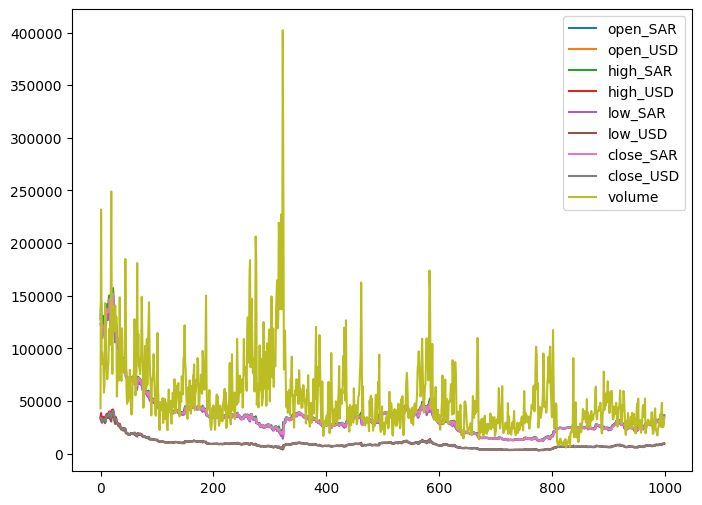

In [ ]:
DF.plot(figsize=(8,6))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

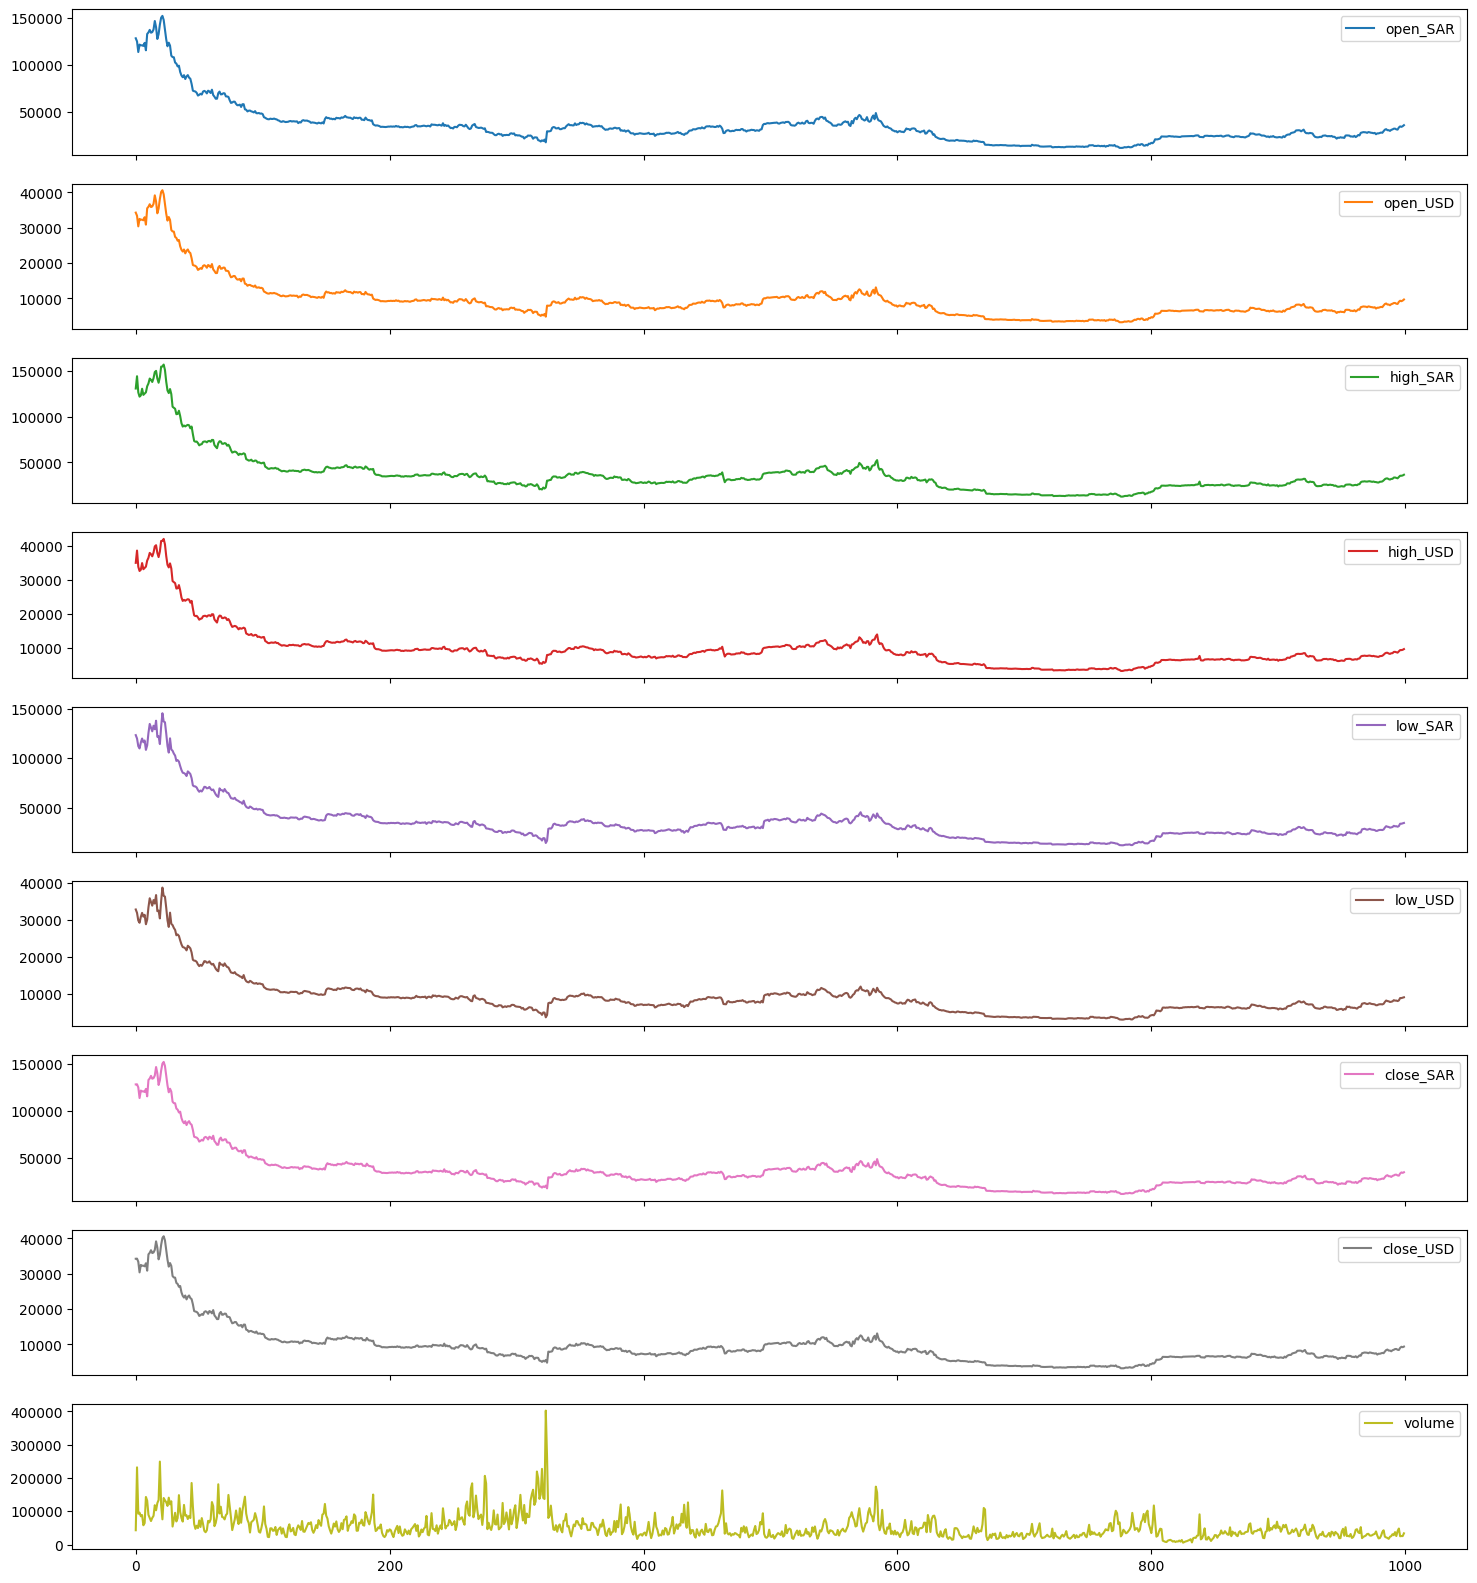

In [ ]:
DF.plot(figsize=(18,20),subplots=True)

array([[<Axes: title={'center': 'open_SAR'}>,
        <Axes: title={'center': 'open_USD'}>,
        <Axes: title={'center': 'high_SAR'}>],
       [<Axes: title={'center': 'high_USD'}>,
        <Axes: title={'center': 'low_SAR'}>,
        <Axes: title={'center': 'low_USD'}>],
       [<Axes: title={'center': 'close_SAR'}>,
        <Axes: title={'center': 'close_USD'}>,
        <Axes: title={'center': 'volume'}>]], dtype=object)

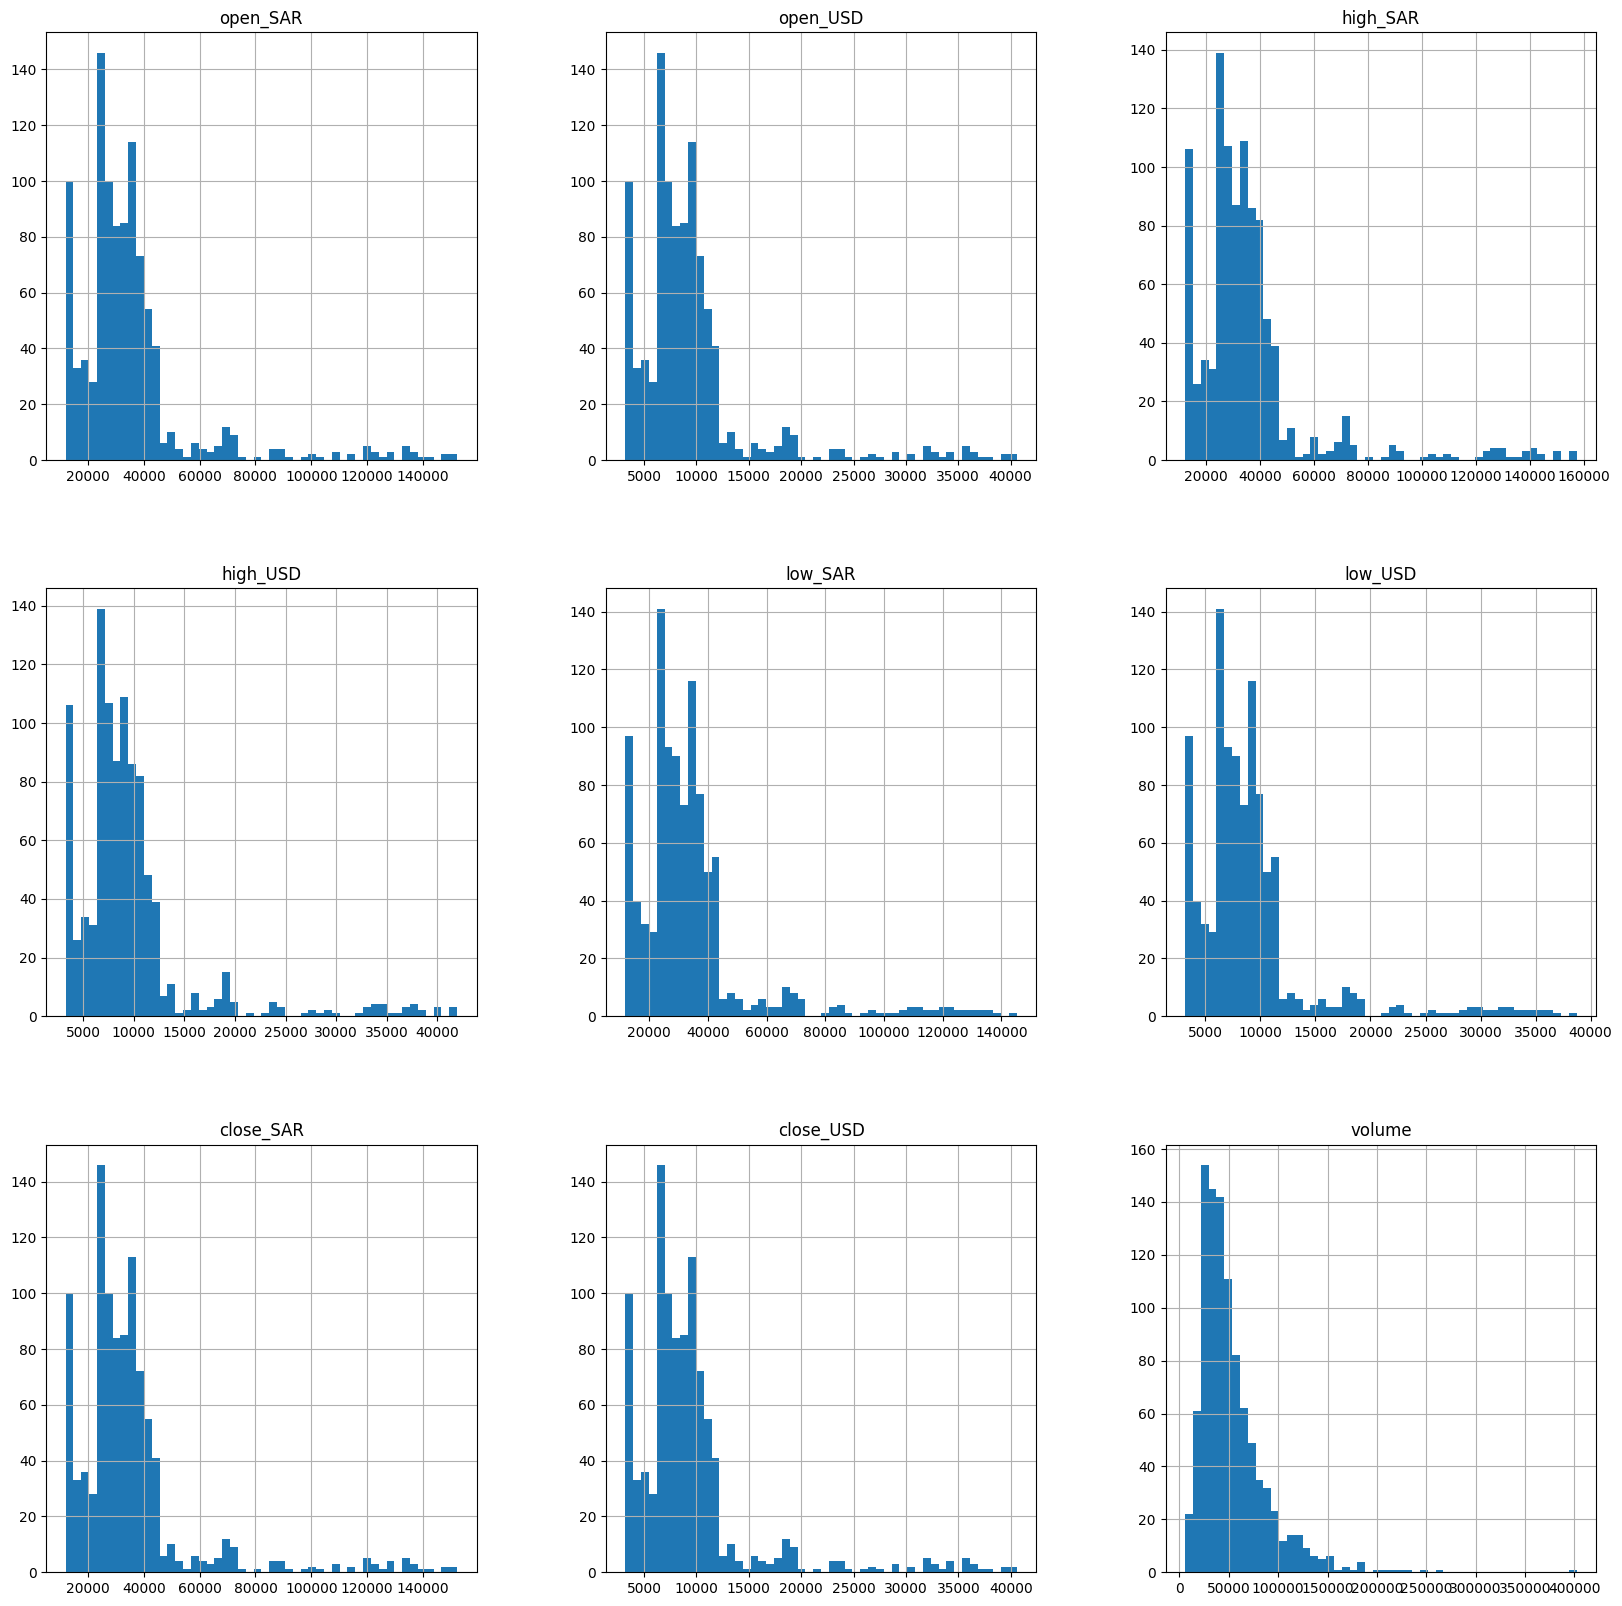

In [ ]:
DF.hist(figsize=(20,20),bins=50)

In [ ]:
DF=DF.iloc[:,1:]

In [ ]:
DF=DF.astype(np.float32)

In [ ]:
temp=DF['open_USD']

In [353]:
temp.head()

0    34246.281250
1    33368.179688
2    30362.189453
3    32464.009766
4    32254.189453
Name: open_USD, dtype: float32

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
scaledData=Scaler.fit_transform(temp.values.reshape(-1,1))

In [ ]:
scaledData.shape

(1000, 1)

In [ ]:
scaledData[:5]

array([[0.8303508 ],
       [0.80685663],
       [0.72642934],
       [0.78266495],
       [0.7770511 ]], dtype=float32)

In [ ]:
new_DF=pd.DataFrame(scaledData)

In [ ]:
new_DF.shape

(1000, 1)

In [359]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
      n_vars = 1 if type(data) is list else data.shape[1]
      df = pd.DataFrame(data)
      cols, names = list(), list()
      # input sequence (t-n, ... t-1)
      for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [("var%d(t-%d)" % (j+1, i)) for j in range(n_vars)]
      # forecast sequence (t, t+1, ... t+n)
      for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                  names += [("var%d(t)" % (j+1)) for j in range(n_vars)]
            else:
                  names += [("var%d(t+%d)" % (j+1, i)) for j in range(n_vars)]
      # put it all together
      agg = pd.concat(cols, axis=1)
      agg.columns = names
      # drop rows with NaN values
      if dropnan:
            agg.dropna(inplace=True)
      return agg

In [ ]:
i_in  = 200
n_out = 1 
reframed = series_to_supervised(new_DF, i_in, n_out)
print("Represent the dataset as a supervised learning problem : \n",reframed.head(10))

Represent the dataset as a supervised learning problem : 
      var1(t-200)  var1(t-199)  var1(t-198)  var1(t-197)  var1(t-196)  \
200     0.830351     0.806857     0.726429     0.782665     0.777051   
201     0.806857     0.726429     0.782665     0.777051     0.777192   
202     0.726429     0.782665     0.777051     0.777192     0.772337   
203     0.782665     0.777051     0.777192     0.772337     0.795668   
204     0.777051     0.777192     0.772337     0.795668     0.739534   
205     0.777192     0.772337     0.795668     0.739534     0.863045   
206     0.772337     0.795668     0.739534     0.863045     0.874649   
207     0.795668     0.739534     0.863045     0.874649     0.893927   
208     0.739534     0.863045     0.874649     0.893927     0.872590   
209     0.863045     0.874649     0.893927     0.872590     0.877138   

     var1(t-195)  var1(t-194)  var1(t-193)  var1(t-192)  var1(t-191)  ...  \
200     0.777192     0.772337     0.795668     0.739534     0.863045  .

In [361]:
reframed.shape

(800, 201)

In [362]:
X=reframed.iloc[:,:-1]
y=reframed.iloc[:,-1]

In [363]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y ,test_size=0.1,shuffle=False,random_state=0)

In [364]:
print("X_train shape : ",X_train.shape," y_train shape : ",y_train.shape)
print("X_test shape  : ",X_test.shape, " y_test shape  : ",y_test.shape)

X_train shape :  (720, 200)  y_train shape :  (720,)
X_test shape  :  (80, 200)  y_test shape  :  (80,)


In [365]:
X_train=np.expand_dims(X_train,axis=1)
X_test=np.expand_dims(X_test,axis=1)
print("X_train shape 3D : ",X_train.shape," y_train shape : ",y_train.shape)
print("X_test shape  3D : ",X_test.shape, " y_test shape  : ",y_test.shape)

X_train shape 3D :  (720, 1, 200)  y_train shape :  (720,)
X_test shape  3D :  (80, 1, 200)  y_test shape  :  (80,)


In [366]:
print("X_train shape after reshaping:", X_train.shape)  # Should be (43, 16, 1)
print("X_test shape after reshaping:", X_test.shape)    # Should be (5, 16, 1)

X_train shape after reshaping: (720, 1, 200)
X_test shape after reshaping: (80, 1, 200)


In [367]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.GRU(256, return_sequences=True, activation="relu", 
            kernel_initializer="he_normal", recurrent_initializer="he_normal", 
            dropout=0.15, recurrent_dropout=0.15,
						input_shape=(X_train.shape[1], X_train.shape[2]) ))
model.add(keras.layers.GRU(128,return_sequences=True, activation="relu", kernel_initializer="he_normal", 
            recurrent_initializer="he_normal", dropout=0.15, recurrent_dropout=0.15 ))
model.add(keras.layers.GRU(64, activation="relu", kernel_initializer="he_normal", 
            recurrent_initializer="he_normal", dropout=0.15, recurrent_dropout=0.15 ))
model.add(keras.layers.Dense(1, activation="relu"))

print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_45 (GRU)                    │ (None, 1, 256)         │       351,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_46 (GRU)                    │ (None, 1, 128)         │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_47 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537,281 (2.05 MB)

 Trainable params: 537,281 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

None


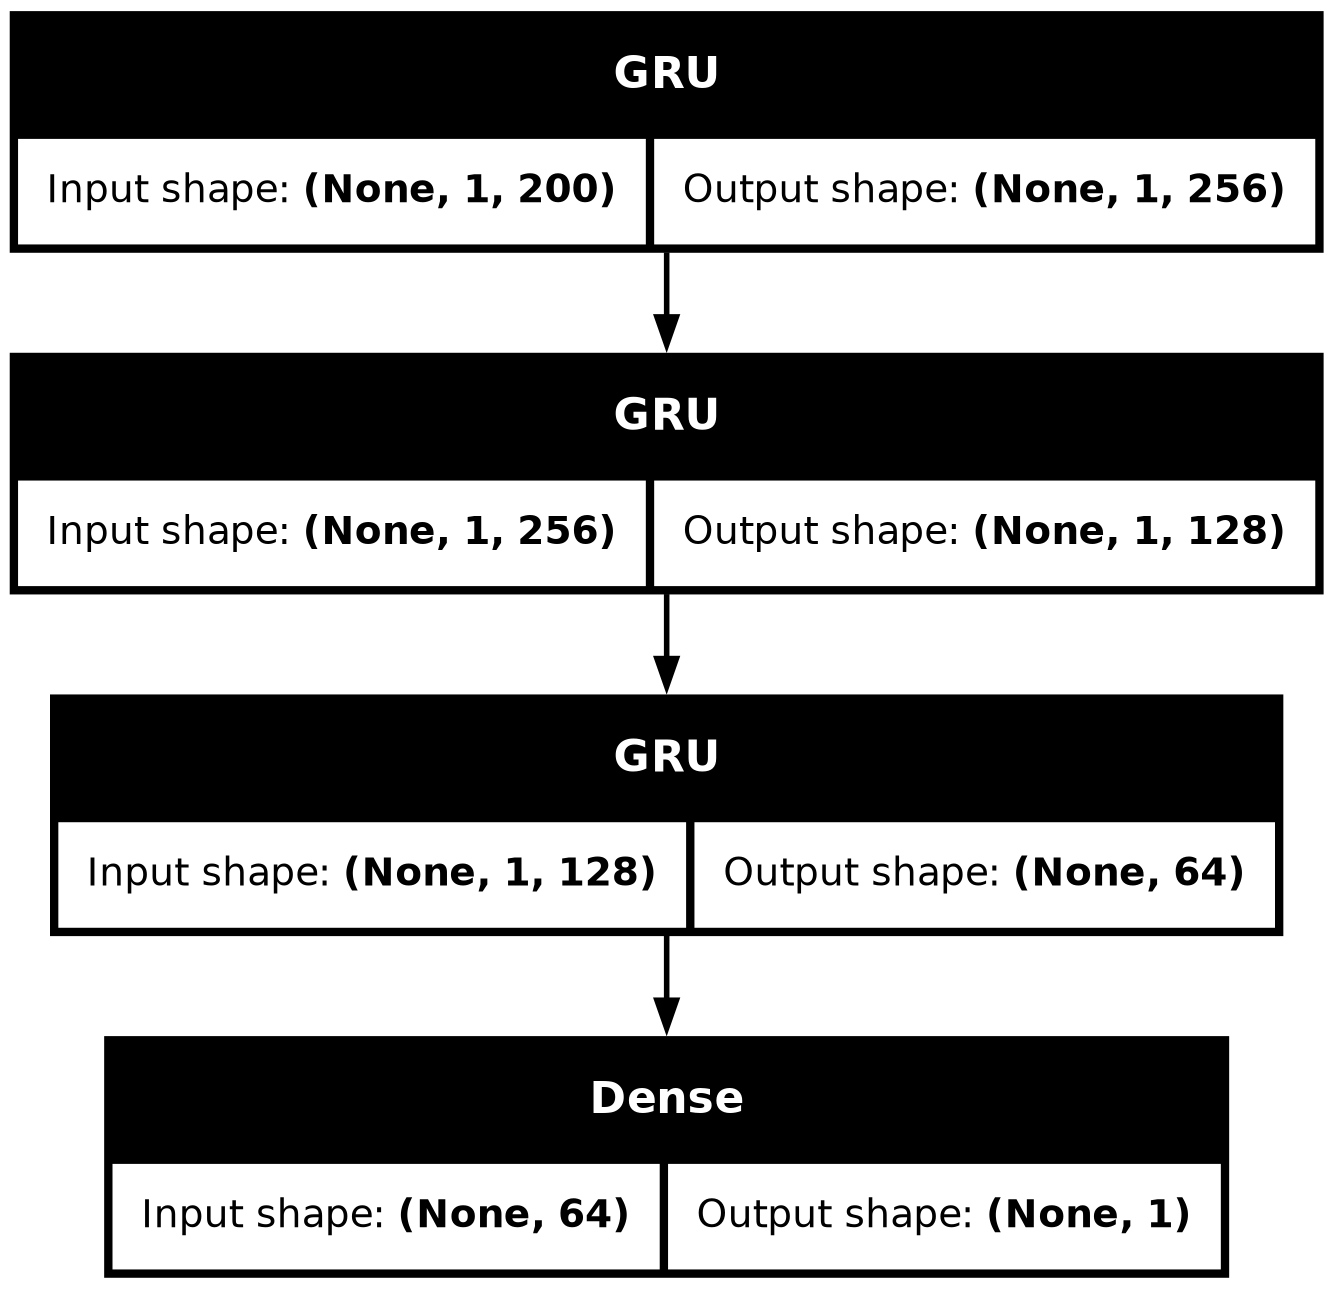

In [368]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [369]:
optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mse","mae"])

# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.00001, patience=3,
                                      monitor="val_loss", min_lr=0.00000001)
# Training and evaluating the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100, batch_size=64,
                    callbacks=[lr_scheduler])

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0305 - mae: 0.1146 - mse: 0.0305 - val_loss: 5.2026e-04 - val_mae: 0.0190 - val_mse: 5.2026e-04 - learning_rate: 0.0100
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - mae: 0.0521 - mse: 0.0040 - val_loss: 8.3867e-04 - val_mae: 0.0222 - val_mse: 8.3867e-04 - learning_rate: 0.0100
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - mae: 0.0370 - mse: 0.0020 - val_loss: 0.0014 - val_mae: 0.0318 - val_mse: 0.0014 - learning_rate: 0.0100
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - mae: 0.0310 - mse: 0.0015 - val_loss: 5.3571e-04 - val_mae: 0.0202 - val_mse: 5.3571e-04 - learning_rate: 0.0100
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8542e-04 - mae: 0.0254 - mse: 9.8542e-04 - val_loss: 5.3570e-04 - val_mae: 0.0202 - val_mse: 5.3570e-04 - learning_rate: 1.0000e-07
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5242e-04 - mae: 0.0244 -

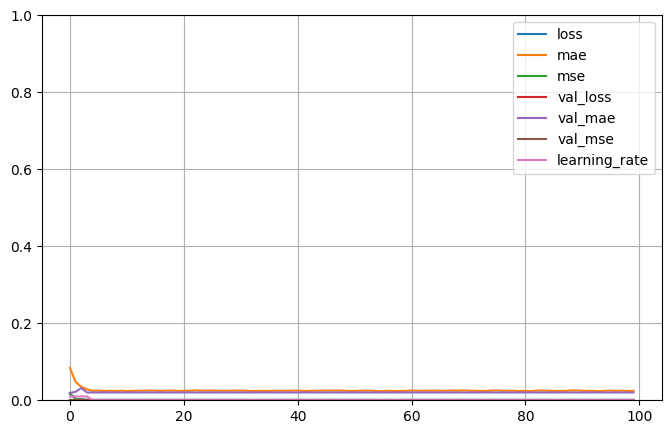

In [370]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [371]:
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                   : ",model_evaluate[0])
print("Mean Squared Error     : ",model_evaluate[1])
print("Mean Absolute Error    : ",model_evaluate[2]) 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5303e-04 - mae: 0.0208 - mse: 5.5303e-04 
Loss                   :  0.0005356551264412701
Mean Squared Error     :  0.0005356551264412701
Mean Absolute Error    :  0.020241957157850266


In [372]:
trainPredict = model.predict(X_train)
testPredict  = model.predict(X_test)
print("trainPredict : ",trainPredict.shape)
print("testPredict  : ",testPredict.shape)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
trainPredict :  (720, 1)
testPredict  :  (80, 1)


In [373]:
testPredict = Scaler.inverse_transform(testPredict.reshape(-1,1))

In [374]:
y_test=Scaler.inverse_transform(y_test.values.reshape(-1,1))

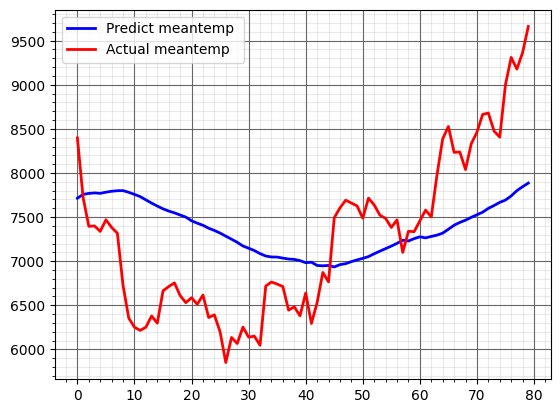

In [375]:
plt.plot(testPredict[:,0], color="blue", 
         label="Predict meantemp ", linewidth=2)

plt.plot(y_test[:,0], color="red", 
         label="Actual meantemp ", linewidth=2)

plt.legend()
# Show the major grid lines with dark grey lines
plt.grid(visible=True, which="major", color="#666666", linestyle="-")
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(visible=True, which="minor", color="#999999", linestyle="-", alpha=0.2)

plt.show()

<Axes: >

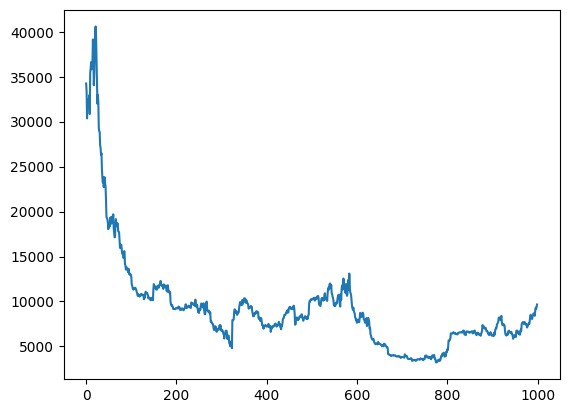

In [ ]:
DF['open_USD'].plot()